# OPT - graphs

In [1]:
import glob
import re
import pandas as pd
import os

In [79]:
!pwd

/data/users/sousal/03_compare_methods/03.1.OPT-denovo


In [80]:
# Encontrar files recursivamente em subDirectorys
files = glob.glob("**/populations.log", recursive=True)  # Procura em todas as subDirectorys
print(f"Find {len(files)} files")



Find 239 files


In [81]:
results = []

for file in files:
    try:
        with open(file, 'r') as f:
            for linha in f:
                # Procurar a linha específica
                if 'variant sites remained' in linha:
                    match = re.search(r'(\d+)\s*variant sites remained', linha)
                    if match:
                        variant_sites = int(match.group(1))
                        results.append({
                            'File': file,
                            'Directory': os.path.dirname(file),
                            'Variant_Sites': variant_sites
                        })
                    break  # Para após encontrar
                    
    except Exception as e:
        print(f"Erro em {file}: {e}")

df = pd.DataFrame(results)
print(f"✅ Extracted {len(df)} values")
display(df.head())

✅ Extracted 239 values


,File,Directory,Variant_Sites
0,opt-denovo-alt/denovo-ALT.M4.n2/populations.log,opt-denovo-alt/denovo-ALT.M4.n2,53995
1,opt-denovo-alt/denovo-ALT.M1.n6/populations.log,opt-denovo-alt/denovo-ALT.M1.n6,57252
2,opt-denovo-alt/denovo-ALT.M3.n6/populations.log,opt-denovo-alt/denovo-ALT.M3.n6,60159
3,opt-denovo-alt/denovo-ALT.M3.n3/populations.log,opt-denovo-alt/denovo-ALT.M3.n3,54889
4,opt-denovo-alt/denovo-ALT.M6.n10/populations.log,opt-denovo-alt/denovo-ALT.M6.n10,61403


In [82]:
df['Directory'].head()

0     opt-denovo-alt/denovo-ALT.M4.n2
1     opt-denovo-alt/denovo-ALT.M1.n6
2     opt-denovo-alt/denovo-ALT.M3.n6
3     opt-denovo-alt/denovo-ALT.M3.n3
4    opt-denovo-alt/denovo-ALT.M6.n10
Name: Directory, dtype: object

In [83]:
df['Directory'] = df['Directory'].str.replace('^03_compare_methods/03.1.OPT-denovo/opt-denovo.*/denovo-','', regex='False')
df.head()

,File,Directory,Variant_Sites
0,opt-denovo-alt/denovo-ALT.M4.n2/populations.log,opt-denovo-alt/denovo-ALT.M4.n2,53995
1,opt-denovo-alt/denovo-ALT.M1.n6/populations.log,opt-denovo-alt/denovo-ALT.M1.n6,57252
2,opt-denovo-alt/denovo-ALT.M3.n6/populations.log,opt-denovo-alt/denovo-ALT.M3.n6,60159
3,opt-denovo-alt/denovo-ALT.M3.n3/populations.log,opt-denovo-alt/denovo-ALT.M3.n3,54889
4,opt-denovo-alt/denovo-ALT.M6.n10/populations.log,opt-denovo-alt/denovo-ALT.M6.n10,61403


In [84]:
df['Directory'] = df['Directory'].str.replace('^opt.*/denovo-','', regex='False')
df.head()

,File,Directory,Variant_Sites
0,opt-denovo-alt/denovo-ALT.M4.n2/populations.log,ALT.M4.n2,53995
1,opt-denovo-alt/denovo-ALT.M1.n6/populations.log,ALT.M1.n6,57252
2,opt-denovo-alt/denovo-ALT.M3.n6/populations.log,ALT.M3.n6,60159
3,opt-denovo-alt/denovo-ALT.M3.n3/populations.log,ALT.M3.n3,54889
4,opt-denovo-alt/denovo-ALT.M6.n10/populations.log,ALT.M6.n10,61403


In [85]:
df[['Group', 'Parameters']] = df['Directory'].str.split('.', n=1, expand=True)
df.head()

,File,Directory,Variant_Sites,Group,Parameters
0,opt-denovo-alt/denovo-ALT.M4.n2/populations.log,ALT.M4.n2,53995,ALT,M4.n2
1,opt-denovo-alt/denovo-ALT.M1.n6/populations.log,ALT.M1.n6,57252,ALT,M1.n6
2,opt-denovo-alt/denovo-ALT.M3.n6/populations.log,ALT.M3.n6,60159,ALT,M3.n6
3,opt-denovo-alt/denovo-ALT.M3.n3/populations.log,ALT.M3.n3,54889,ALT,M3.n3
4,opt-denovo-alt/denovo-ALT.M6.n10/populations.log,ALT.M6.n10,61403,ALT,M6.n10


In [86]:
# Extract M and N
df['M'] = df['Parameters'].str.extract(r'M(\d+)').astype(int)
df['N'] = df['Parameters'].str.extract(r'n(\d+)').astype(int)

# Reordenar colunas para melhor visualização
ordered_columns = ['File', 'Directory', 'Group', 'Parameters', 'M', 'N', 'Variant_Sites']
df = df[ordered_columns]
df.head()

,File,Directory,Group,Parameters,M,N,Variant_Sites
0,opt-denovo-alt/denovo-ALT.M4.n2/populations.log,ALT.M4.n2,ALT,M4.n2,4,2,53995
1,opt-denovo-alt/denovo-ALT.M1.n6/populations.log,ALT.M1.n6,ALT,M1.n6,1,6,57252
2,opt-denovo-alt/denovo-ALT.M3.n6/populations.log,ALT.M3.n6,ALT,M3.n6,3,6,60159
3,opt-denovo-alt/denovo-ALT.M3.n3/populations.log,ALT.M3.n3,ALT,M3.n3,3,3,54889
4,opt-denovo-alt/denovo-ALT.M6.n10/populations.log,ALT.M6.n10,ALT,M6.n10,6,10,61403


In [87]:
df_MN= df[df['M'] == df['N']]

print(f"✅ Encontrados {len(df_MN)} casos onde M == N")
display(df_MN.head())

✅ Encontrados 27 casos onde M == N


,File,Directory,Group,Parameters,M,N,Variant_Sites
3,opt-denovo-alt/denovo-ALT.M3.n3/populations.log,ALT.M3.n3,ALT,M3.n3,3,3,54889
8,opt-denovo-alt/denovo-ALT.M8.n8/populations.log,ALT.M8.n8,ALT,M8.n8,8,8,60929
9,opt-denovo-alt/denovo-ALT.M9.n9/populations.log,ALT.M9.n9,ALT,M9.n9,9,9,61068
42,opt-denovo-alt/denovo-ALT.M4.n4/populations.log,ALT.M4.n4,ALT,M4.n4,4,4,58176
47,opt-denovo-alt/denovo-ALT.M2.n2/populations.log,ALT.M2.n2,ALT,M2.n2,2,2,48576


In [88]:
df_MN = df_MN.drop(['File','Directory'],axis=1).reset_index(drop=True)

df_MN.head()

,Group,Parameters,M,N,Variant_Sites
0,ALT,M3.n3,3,3,54889
1,ALT,M8.n8,8,8,60929
2,ALT,M9.n9,9,9,61068
3,ALT,M4.n4,4,4,58176
4,ALT,M2.n2,2,2,48576


In [89]:
df_MN.to_csv("opt-denovo-MN.csv")

In [90]:
df_MN_sorted = df_MN.sort_values(['Group', 'M']).reset_index(drop=True)
df_MN_sorted.head()
df_sorted = df_MN_sorted

In [91]:
# Sort the data first
df_sorted['M'] = df_sorted['M'].astype(int)
df_sorted = df_MN_sorted.sort_values(['Group', 'M']).reset_index(drop=True)

# Calculate difference from previous M value within each group
df_sorted['Variant_Sites_Diff'] = df_sorted.groupby('Group')['Variant_Sites'].diff()
df_sorted['Percent_Change'] = (df_sorted.groupby('Group')['Variant_Sites'].pct_change() * 100).round(2)

print("✅ Differences calculated:")
display(df_sorted[['Group', 'M', 'Variant_Sites', 'Variant_Sites_Diff','Percent_Change']])

✅ Differences calculated:


,Group,M,Variant_Sites,Variant_Sites_Diff,Percent_Change
0,ALT,1,33885,NaN,NaN
1,ALT,2,48576,14691.0,43.36
2,ALT,3,54889,6313.0,13.00
3,ALT,4,58176,3287.0,5.99
4,ALT,5,59661,1485.0,2.55
5,ALT,6,60462,801.0,1.34
6,ALT,7,60824,362.0,0.60
7,ALT,8,60929,105.0,0.17
8,ALT,9,61068,139.0,0.23
9,GRP,1,2345,NaN,NaN


In [92]:
# Step 2: Recalculate Previous_M as integer
df_sorted['Previous_M'] = df_sorted.groupby('Group')['M'].shift(1).astype('Int64')  # Int64 supports NaN

# Step 3: Create clean M_Pair
df_sorted['M_Pair'] = df_sorted['Previous_M'].astype(str) + '→' + df_sorted['M'].astype(str)

# Step 4: Remove rows where M_Pair has "nan→" (first row of each group)
display_df = df_sorted.dropna(subset=['Previous_M']).reset_index(drop=True)

display(display_df)

,Group,Parameters,M,N,Variant_Sites,Variant_Sites_Diff,Percent_Change,Previous_M,M_Pair
0,ALT,M2.n2,2,2,48576,14691.0,43.36,1,1→2
1,ALT,M3.n3,3,3,54889,6313.0,13.00,2,2→3
2,ALT,M4.n4,4,4,58176,3287.0,5.99,3,3→4
3,ALT,M5.n5,5,5,59661,1485.0,2.55,4,4→5
4,ALT,M6.n6,6,6,60462,801.0,1.34,5,5→6
5,ALT,M7.n7,7,7,60824,362.0,0.60,6,6→7
6,ALT,M8.n8,8,8,60929,105.0,0.17,7,7→8
7,ALT,M9.n9,9,9,61068,139.0,0.23,8,8→9
8,GRP,M2.n2,2,2,3540,1195.0,50.96,1,1→2
9,GRP,M3.n3,3,3,4102,562.0,15.88,2,2→3


In [93]:
#df_existing['M_Pair'] = df_existing['M_Pair'].str.replace('\.0', '', regex=True)

# Step 4: Display results
print("Final table with differences:")
result_columns = ['Group', 'M_Pair', 'Variant_Sites', 'Variant_Sites_Diff', 'Percent_Change']
display_df = df_sorted[result_columns].dropna(subset=['Variant_Sites_Diff'])
display(display_df)

Final table with differences:


,Group,M_Pair,Variant_Sites,Variant_Sites_Diff,Percent_Change
1,ALT,1→2,48576,14691.0,43.36
2,ALT,2→3,54889,6313.0,13.00
3,ALT,3→4,58176,3287.0,5.99
4,ALT,4→5,59661,1485.0,2.55
5,ALT,5→6,60462,801.0,1.34
6,ALT,6→7,60824,362.0,0.60
7,ALT,7→8,60929,105.0,0.17
8,ALT,8→9,61068,139.0,0.23
10,GRP,1→2,3540,1195.0,50.96
11,GRP,2→3,4102,562.0,15.88


In [94]:
display_df.head()

,Group,M_Pair,Variant_Sites,Variant_Sites_Diff,Percent_Change
1,ALT,1→2,48576,14691.0,43.36
2,ALT,2→3,54889,6313.0,13.00
3,ALT,3→4,58176,3287.0,5.99
4,ALT,4→5,59661,1485.0,2.55
5,ALT,5→6,60462,801.0,1.34


In [95]:
display_df.to_csv('variant_sites_differences.csv', index=False)
print("💾 Differences saved to 'variant_sites_differences.csv'")


💾 Differences saved to 'variant_sites_differences.csv'


# The graphs

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [97]:
display_df['Group'].unique()

array(['ALT', 'GRP', 'phylo'], dtype=object)

In [ ]:
display_df = pd.read_csv("variant_sites_differences.csv")


KeyboardInterrupt



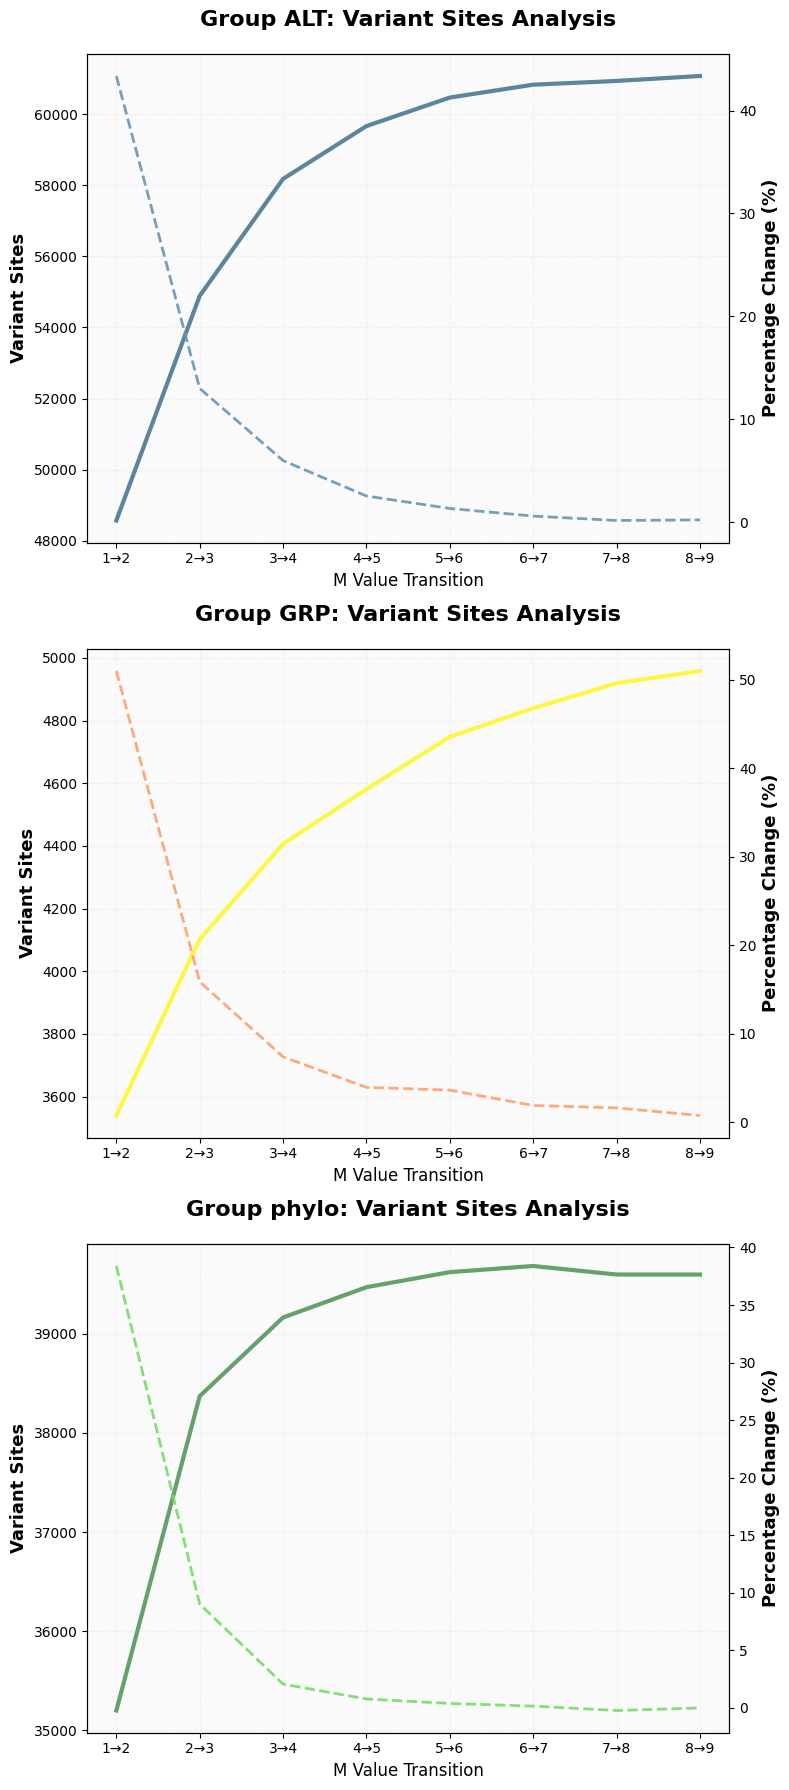

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your custom color palette
group_colors = {
    'ALT': {'primary': '#4b7793', 'secondary': '#6895b2'},      # Soft blue tones
    'GRP': {'primary': '#fff630', 'secondary': '#ffa06d'},      # Yellow + peach
    'phylo': {'primary': '#55985e', 'secondary': '#77db68'},    # Green tones (fixed the color code)
}

# Create subplots for each group
groups = display_df['Group'].unique()
n_groups = len(groups)

fig, axes = plt.subplots(n_groups, 1, figsize=(8, 6 * n_groups))

# If only one group, make axes a list
if n_groups == 1:
    axes = [axes]

for i, group in enumerate(groups):
    group_data = display_df[display_df['Group'] == group]
    
    # Get colors for this group
    if group in group_colors:
        color_primary = group_colors[group]['primary']
        color_secondary = group_colors[group]['secondary']
    else:
        # Fallback to default colors
        color_primary = '#7F7F7F'
        color_secondary = '#E2E2E2'
    
    # Create twin axes
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # Plot Variant_Sites on left axis
    line1 = ax1.plot(group_data['M_Pair'], group_data['Variant_Sites'], 
                     '', color=color_primary, linewidth=3, markersize=10, 
                     markerfacecolor='white', markeredgecolor=color_primary, 
                     markeredgewidth=2, label='Variant Sites', alpha=0.9)
    
    # Plot Percentage Change on right axis
    line2 = ax2.plot(group_data['M_Pair'], group_data['Percent_Change'], 
                     '--', color=color_secondary, linewidth=2, markersize=8,
                      label='% Change', alpha=0.9)
    
    # Customize left axis - BLACK
    ax1.set_ylabel('Variant Sites', color='black', fontsize=13, fontweight='bold')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(True, alpha=0.2, linestyle='--', color='#cccccc')
    ax1.set_facecolor('#fafafa')
    
    # Customize right axis - BLACK
    ax2.set_ylabel('Percentage Change (%)', color='black', fontsize=13, fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='black')
    
    # Title and labels - BLACK
    ax1.set_title(f'Group {group}: Variant Sites Analysis', 
                  fontsize=16, fontweight='bold', pad=20, 
                  color='black')
    
    ax1.set_xlabel('M Value Transition', fontsize=12, color='black')
    
    # X-axis ticks - BLACK
    ax1.tick_params(axis='x', colors='black')
    
    # Combine legends
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
 
    
 
    

plt.tight_layout()
plt.show()